# Analysis of the performance of students of Ultra-Brain Science Academy in 2024 JAMB Exam
By Valentine Ezenwanne

## Abstract

The admission of students into higher institutions requires that the student must write and pass the **Joint Admission Matriculation Examination (JAMB)**. This exam comprises of an English questions and questions from three other subjects of choice which depends on the courses they applied for and in the case of science student, they had to choose between **Maths, Physics, Biology, Chemistry**

The Academy registered a total of **56 students**, 35 where females and 12 are males, two of the female candidates were married while the rest are single. A total of 15 student lived far from the center and take bus to reach the academy. 50% of the student work and attend lesson

Analysis of score showed a mean score of 212 with a standard deviation of 12.3. The highest and lowest score being 290 and 146 respectively

Paired sample t-test was carried out on student who had written both in 2023 and 2024, to investigate if the tutoring had improved the performance of the students in the exam. result show that the means are statistically different at 0.05 significance level. This implies the tutoring contributed significantly to better performance of the students

Further analysis showed that the Female student performed better with a mean score of 214 which is 2 point higher than male and with a standard deviation of 25

Students who had three months of tutoring performed better on average than students who had fewer months of tutoring

## Objective

- To analyze the performance of Ultra-Brain Students in the JAMB 2024 exam
- To evaluate factors that contributed to their performance
- To create a dashboard that provide an insight into the performance of students

## Dataset Description

### Data Collection

- The data was collected by means of survey. The students were sent a survey to answer some questions and the information collected was inputed into an Excel worksheet

### Feature Description

- **Student ID:** This is a unique id given to the students when they registered
- **Student Name:** This is the full name of the student
- **Marital Status:** This indicate if the student is married or single (YES: Married, No: Not Married)
- **Gender:** This indicate the gender of the student (F: Female, M: Male)
- **Year 2023:** This is the score of the student in JAMB in the previous year 2023.
- **Year 2024:** This is the score of the studentin JAMB in the current year 2024
- **English:** This is the score of the student in the English subject
- **Chemistry:** This is the score of the student in the Chemistry subject
- **Physics:** This is the score of the student in the Physics subject
- **Biology/Maths:** This is the score of the student either in Maths or Biology subject
- **Total:** This is the total score of the four subjects
- **Date of Birth:** is the date of birth of the students
- **Course Registered:** This is the course that the student applied as their first choice
- **School Registered:** This is the university or college that the student applied for as their first choice
- **Date Registered:** This is the date that the student registered for tutoring at the academy
- **Date Stopped:** This is the date that the tutoring of the student stopped
- **Lesson Fee:** This is the amount that the student payed each month for the tutoring
- **Work Status:** This indicates if the student work and attend lessons (YES: work, NO: Don't Work)
- **Hours Read:** This is the number of hours the student per day
- **Read Past Question:** This indicates if the student prepared for the exam using past questions
- **Teaching Satisfaction:** This indicate the student's level of satisfaction with the tutoring (1: Very Dissatisfied, 2: Dissatisfied, 3: Neutral, 4: Satisfied, 5: Very Satisfied)
- **Finished on time:** This indicates if the student finished the exam on time
- **System Off:** This indicates if the student computer went off during the exam
- **Questions Different:** This indicates if the questions were different from the syllabus
- **Pay Yourself:** This indicates if the student payed for the lesson by themselves
- **Close Proximity to center:** This indicate if the student lives close to the academy or far

### Load the Libraries

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

### Import the data

In [4]:
#load the data
data = pd.read_excel('Jamb Score for UltraBrain Students.xlsx')

In [5]:
#display few lines of the data
data.head(2)

,Student ID,Student Name,Martial Status,Gender,Year 2023,Year 2024,English,Chemistry,Physics,Biology/Maths,Total,Date of Birth,Course registered,School registered,Date Registered,Date Stopped,Lesson Fee,Work Status,Hours read,Read Past Questions,Teaching Satisfaction,Finished on time,System off,Questions different,Pay yourself,Close Proximity to center
0,UB2024001,Chinelo Nneto,Single,F,171.0,217,49,67,53,48,217,2006-01-14,Pharmacy,Unizik,2024-01-09,2024-04-19,13000,No,5,Yes,5,No,No,No,no,yes
1,UB2024002,Mmesoma Ofodile,Single,F,192.0,230,54,59,60,57,230,2007-08-12,Nursing,UNN,2024-01-10,2024-04-19,15000,No,4,Yes,5,Yes,No,No,no,yes


In [6]:
#Understanding the shape of the data
data.shape

(56, 26)

- Data contain 56 students record and 26 column

In [7]:
#checking for missing values
data.isna().sum()

Student ID                    0
Student Name                  0
Martial Status                0
Gender                        0
Year 2023                    24
Year 2024                     0
English                       0
Chemistry                     0
Physics                       0
Biology/Maths                 0
Total                         0
Date of Birth                 0
Course registered             0
School registered             0
Date Registered               0
Date Stopped                  0
Lesson Fee                    0
Work Status                   0
Hours  read                   0
Read Past Questions           0
Teaching Satisfaction         0
Finished on time              0
System off                    0
Questions different           0
Pay yourself                  0
Close Proximity to center     0
dtype: int64

- There are 24 missing values in Year 2023 column

In [8]:
#checking for duplicates
data.duplicated().sum()

0

- There are no duplicates

In [9]:
#checking for datatypes
data.dtypes

Student ID                           object
Student Name                         object
Martial Status                       object
Gender                               object
Year 2023                           float64
Year 2024                             int64
English                               int64
Chemistry                             int64
Physics                               int64
Biology/Maths                         int64
Total                                 int64
Date of Birth                datetime64[ns]
Course registered                    object
School registered                    object
Date Registered              datetime64[ns]
Date Stopped                 datetime64[ns]
Lesson Fee                            int64
Work Status                          object
Hours  read                           int64
Read Past Questions                  object
Teaching Satisfaction                 int64
Finished on time                     object
System off                      

- The data consists of string, integer, float and date datatypes

## Data Wrangling

In [10]:
#create a copy of the dataframe
df = data.copy()

In [11]:
#checking column names
df.columns

Index(['Student ID', 'Student Name', 'Martial Status', 'Gender', 'Year 2023',
       'Year 2024', 'English', 'Chemistry', 'Physics', 'Biology/Maths',
       'Total', 'Date of Birth', 'Course registered', 'School registered',
       'Date Registered', 'Date Stopped', 'Lesson Fee', 'Work Status',
       'Hours  read', 'Read Past Questions', 'Teaching Satisfaction',
       'Finished on time', 'System off', 'Questions different', 'Pay yourself',
       'Close Proximity to center'],
      dtype='object')

In [12]:
#renaming column names
df.rename(columns={
    'Martial Status': "Marital Status",
    "Course registered" : "Course Registered",
    "School registered" : "University Registered",
    "Hours  read" : "Hours Read",
    'System off': 'Computer Off',
    'Questions different': 'Questions Different',
    'Pay yourself': 'Pay Yourself',
    'Year 2023' : 'Score 2023',
    'Year 2024' : 'Score 2024'
}, inplace=True
         )

In [13]:
#confirming the column name has been changed
df.columns

Index(['Student ID', 'Student Name', 'Marital Status', 'Gender', 'Score 2023',
       'Score 2024', 'English', 'Chemistry', 'Physics', 'Biology/Maths',
       'Total', 'Date of Birth', 'Course Registered', 'University Registered',
       'Date Registered', 'Date Stopped', 'Lesson Fee', 'Work Status',
       'Hours Read', 'Read Past Questions', 'Teaching Satisfaction',
       'Finished on time', 'Computer Off', 'Questions Different',
       'Pay Yourself', 'Close Proximity to center'],
      dtype='object')

### Feature Engineering

In [14]:
#creating the Student Age column
df['Student Age'] = df['Date Registered'].dt.year - df['Date of Birth'].dt.year

In [15]:
#confirming the Student Age have been created
df['Student Age'].head()

0    18
1    17
2    19
3    20
4    19
Name: Student Age, dtype: int32

In [16]:
#creating the month registered and month stopped
df['Month Registered'] = df['Date Registered'].dt.month
df['Month Name'] = df['Date Registered'].dt.month_name()
df['Month Stopped'] = df['Date Stopped'].dt.month

In [17]:
#Creating the Lesson duration (months) column
df['Lesson Duration (Months)'] = df['Month Stopped']-df['Month Registered']

In [18]:
#Create total lesson fee payed by each student for the lesson duration
df['Total Lesson Fee'] = df['Lesson Fee']*df['Lesson Duration (Months)']

In [19]:
#create week number the student registered
df['Week Registered'] = df['Date Registered'].dt.strftime('%U')

## Data Exploration

#### Gender Distribution

In [20]:
#To determine the gender distribution of the students
df['Gender'].value_counts()

Gender
F    40
M    16
Name: count, dtype: int64

- There are **40 female** students and **16 male** students

#### Marital Status Distribution

In [21]:
#check the marital status distribution
df['Marital Status'].value_counts()

Marital Status
Single     54
Married     2
Name: count, dtype: int64

- **54** students were single whereas only **2** are married

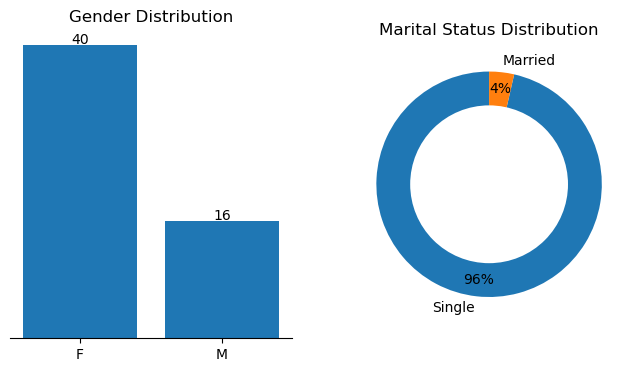

In [22]:
#plot a bar chart and pie chart of the Gender and Marital Status respectively
fig, ax = plt.subplots(1,2, figsize=[8,4])

ax[0].bar(x=df['Gender'].value_counts().index, height=df['Gender'].value_counts().values)
ax[1].pie(df['Marital Status'].value_counts().values, labels=df['Marital Status'].value_counts().index, startangle=90, 
          autopct="%.0f%%", pctdistance=0.85)

donut_hole = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)

#add title
ax[0].set_title('Gender Distribution')
ax[1].set_title('Marital Status Distribution')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)

#remove y-axis
ax[0].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df['Gender'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.7), ha='center', va='center')


plt.show()
          

- **40** students are female whereas only **16** are male
- **4%** of the student are married whereas 96% are single

#### Student Age Distribution

In [24]:
#Age distribution of the students
df['Student Age'].value_counts().sort_index(ascending=True)

Student Age
17     8
18    25
19     9
20     7
21     1
22     1
23     1
24     1
25     3
Name: count, dtype: int64

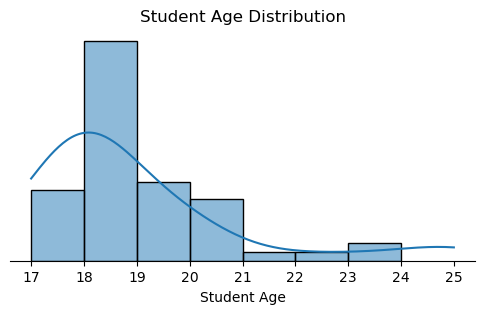

In [34]:
#plot a histogram of the student age 

#create a bin for plotting the histogram
bins = np.arange(df['Student Age'].min(), df['Student Age'].max(), 1)

fig, ax = plt.subplots(figsize=[6,3])

sns.histplot(data=df, x='Student Age', bins=bins, kde=True)

#add title
ax.set_title('Student Age Distribution')
ax.set_xlabel('Student Age')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)

#remove y-axis
ax.yaxis.set_visible(False)

    
plt.show()

- The Age distribution of the student is skewed to the left with majority of the student age lies between 17 - 20 years.
- It shows majority of the student are 18 years of age as at the year they wrote the exam. 

#### Distriution of Courses Registered

In [35]:
#to get the distriution of courses registered
df['Course Registered'].value_counts()

Course Registered
Nursing                   29
Medicine                   6
Pharmacy                   5
Computer Science           4
Med Lab                    4
Radiography                2
Cyber Security             1
Med Rehabilitation         1
Industrial Chemistry       1
Civil Engineer             1
Mechanical Eng             1
Electrical Engineering     1
Name: count, dtype: int64

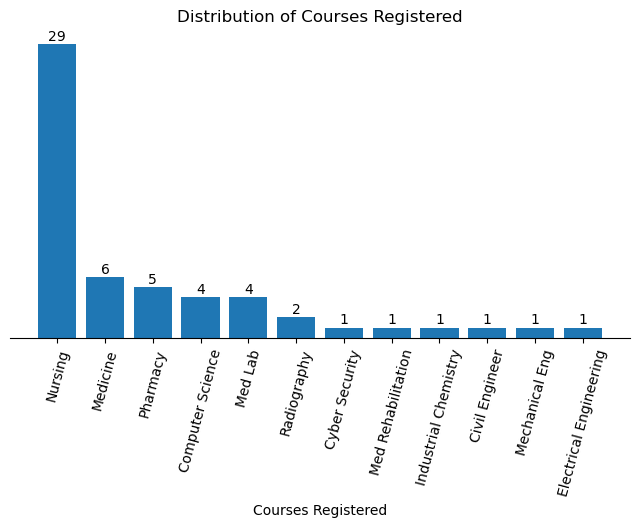

In [36]:
#plotting a bar chart of the distribution of the courses registered

fig, ax = plt.subplots(figsize=[8,4])
ax.bar(x=df['Course Registered'].value_counts().index, height=df['Course Registered'].value_counts().values)

#add title, label and remove yaxis
ax.set_title('Distribution of Courses Registered')
ax.set_xlabel('Courses Registered')
ax.yaxis.set_visible(False)

#rotate the x-ticks
ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Course Registered'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')

plt.show()

- With the demand for professional nurses, about 29 students which is 52% of the students applied to study Nursing.
- Medicine and Pharmacy ranked second and third with about 11% and 9% of the student who applied for them respectively

#### Distribution of Nursing by Gender

In [37]:
#Create a dataframe of students that applied for nursing and grouping by gender
nursing = df[df['Course Registered']=="Nursing"].groupby(['Gender'], as_index=False).agg(total_no=('Student Name', 'count'))
nursing

,Gender,total_no
0,F,25
1,M,4


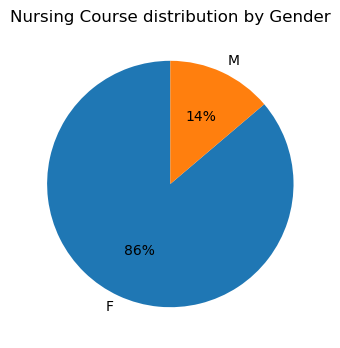

In [38]:
#plotting a pie-chart of the distribution of the nursing course by gender
fig, ax = plt.subplots(figsize=[5,4])

ax.pie(nursing['total_no'], labels=nursing['Gender'], autopct="%.0f%%", startangle=90)

ax.set_title('Nursing Course distribution by Gender')

plt.show()

- **86%** of the student that applied for nursing course are **female**, while **14%** are male

#### Distriution of University Registered

In [53]:
#to get the distriution of University registered
uni1 = df.groupby(['University Registered'], as_index=False).agg(total_no=('Student ID', 'count'))
uni1.sort_values('total_no', ascending=False)

,University Registered,total_no
6,Unizik,44
3,UNN,6
0,ANSU,1
1,Funai,1
2,IMSU,1
4,Unical,1
5,Uniport,1
7,college of nursing,1


In [55]:
#creating a new column 'university' for aggregating
uni_name =[]
for x in uni1['total_no']:
    if x == 1:
        uni_name.append('Others')
    elif x== 6:
        uni_name.append('UNN')
    elif x== 44:
        uni_name.append('Unizik')

uni1['University'] = uni_name

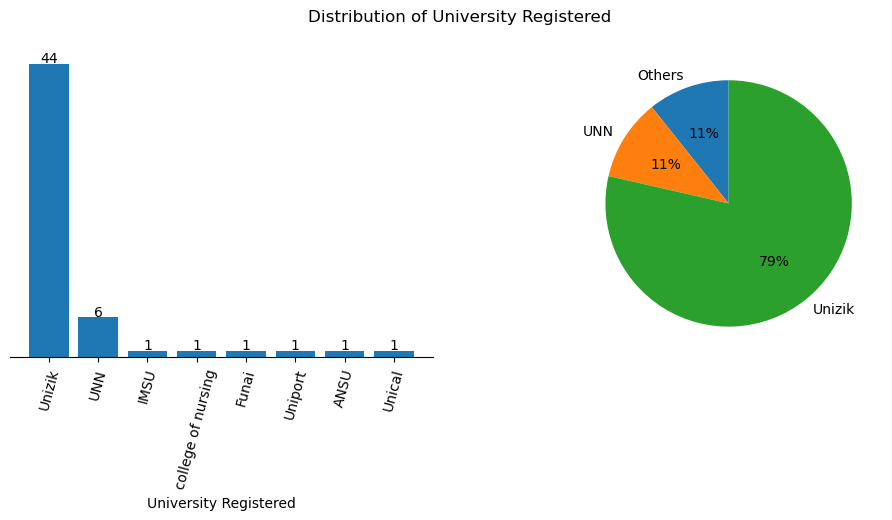

In [56]:
#plotting a barchart and piechart of the distribution of the university registered by the student

fig, ax = plt.subplots(1, 2, figsize=[12,4])
ax[0].bar(x=df['University Registered'].value_counts().index, height=df['University Registered'].value_counts().values)

#add title
fig.suptitle('Distribution of University Registered')
ax[0].set_xlabel('University Registered')
ax[0].yaxis.set_visible(False)

ax[0].xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['University Registered'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')


#create a dataframe for the second plot
uni2 = uni1.groupby(['University'], as_index=False).agg(total_no=('total_no', 'sum'))
ax[1].pie(uni2['total_no'], labels=uni2['University'], startangle=90, autopct='%.0f%%')

plt.show()

- **Nnamdi Azikiwe University (Unizik)** is the most popular choice for students in the Anambra State with about **79%** of the choice
- **University of Nigeria Nsukka (UNN)** is the second popular choice with about **11%** of the choice

#### Timeline of student's registration at the academy

In [79]:
reg = df.groupby(['Month Registered','Month Name','Week Registered'], as_index=False).agg(total_no=('Student ID', 'count'))
reg.head()

,Month Registered,Month Name,Week Registered,total_no
0,1,January,01,10
1,1,January,02,8
2,1,January,03,6
3,1,January,04,10
4,2,February,04,1


In [81]:
#create a new column which merges month and week
reg['Month-Week'] = reg['Month Name'].str[0:3]+' Wk-'+ reg['Week Registered']

In [82]:
#display head
reg.head()

,Month Registered,Month Name,Week Registered,total_no,Month-Week
0,1,January,01,10,Jan Wk-01
1,1,January,02,8,Jan Wk-02
2,1,January,03,6,Jan Wk-03
3,1,January,04,10,Jan Wk-04
4,2,February,04,1,Feb Wk-04


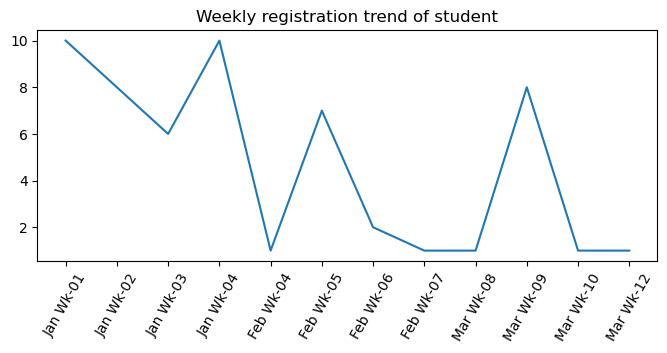

In [83]:
#plot a linechart of the timeline
fig, ax = plt.subplots(figsize=[8,3])
ax.plot(reg['Month-Week'], reg['total_no'])

#add title
ax.set_title('Weekly registration trend of student')
ax.xaxis.set_tick_params(rotation=60)


plt.show()

#### Distribution of the Student Work Status

In [84]:
#distribution of the work status
df['Work Status'].value_counts()

Work Status
No     46
Yes    10
Name: count, dtype: int64

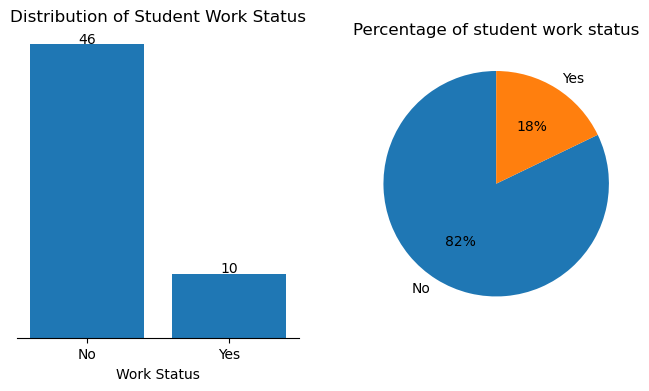

In [85]:
#plotting a barchart and pie-chart of the distribution of the work status of the students

fig, ax = plt.subplots(1, 2, figsize=[8,4])
ax[0].bar(x=df['Work Status'].value_counts().index, height=df['Work Status'].value_counts().values)

#add title
ax[0].set_title('Distribution of Student Work Status')
ax[0].set_xlabel('Work Status')
ax[0].yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Work Status'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')

#plot 2
ax[1].pie(df['Work Status'].value_counts().values, labels=df['Work Status'].value_counts().index, autopct="%.0f%%", startangle=90)

ax[1].set_title('Percentage of student work status')

plt.show()

- About **18%** of the students **work** and attend lesson while **82%** do not work

#### Distribution of hours read

In [124]:
#distribution of number of hours the student read per day
df['Hours Read'].value_counts().sort_index(ascending=True)

Hours Read
2     11
3     25
4     11
5      3
7      1
10     1
Name: count, dtype: int64

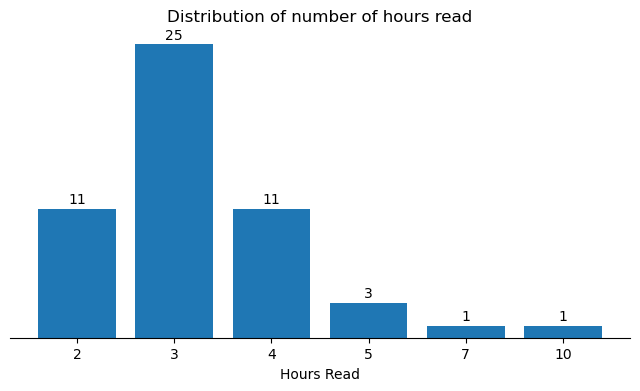

In [130]:
#plot a bar chart of number of hours read

fig, ax = plt.subplots(figsize=[8,4])
hr_read = df.groupby(['Hours Read'], as_index=False).agg(total_hours=('Student Name', 'count'))

#casting hours read as string
hr_read['Hours Read']=hr_read['Hours Read'].astype('str')

ax.bar(x=hr_read['Hours Read'], height=hr_read['total_hours'])

#add title
ax.set_title('Distribution of number of hours read')
ax.set_xlabel('Hours Read')
ax.yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(hr_read['total_hours']):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')

plt.show()

- Majority of the student read between 2 to 4 hours each day with about 25 students reading 3 hours each day

In [132]:
df['Teaching Satisfaction'].value_counts()

Teaching Satisfaction
5    35
4    16
3     1
Name: count, dtype: int64

In [134]:
#Avg Satisfaction
df['Teaching Satisfaction'].sum()/len(df)

4.653846153846154

In [ ]:
# Very Satisfied, Satisfied, Neutral, Dissatisfied, Very Disatisfied

In [135]:
#creating a list of satisfaction 
sat = []
for x in df['Teaching Satisfaction']:
    if x == 1:
        sat.append('Very Dissatisfied')
    elif x == 2:
        sat.append('Dissatisfied')
    elif x == 3:
        sat.append('Neutral')
    elif x == 4:
        sat.append('Satisfied')
    elif x == 5:
        sat.append('Very Satisfied')

In [137]:
#create a satisfaction column in the dataframe
df['Satisfaction'] = sat

In [139]:
#checking the distribution of Satisfaction
df['Satisfaction'].value_counts()

Satisfaction
Very Satisfied    35
Satisfied         16
Neutral            1
Name: count, dtype: int64

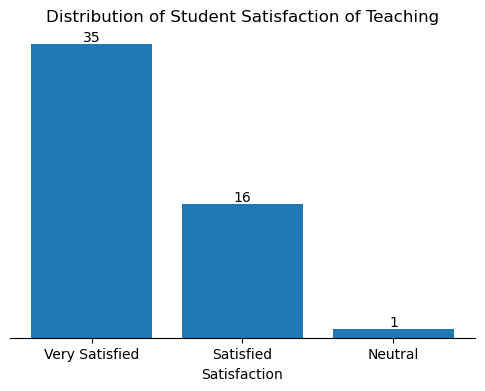

In [141]:
#plot a bar chart of Student satisfaction

fig, ax = plt.subplots(figsize=[6,4])

ax.bar(x=df['Satisfaction'].value_counts().index, height=df['Satisfaction'].value_counts().values)

#add title
ax.set_title('Distribution of Student Satisfaction of Teaching')
ax.set_xlabel('Satisfaction')
ax.yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Satisfaction'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')


plt.show()

- About 98% of the students were satisfied with the teaching that was delivered

#### Distribution of those who have written once and twice

#### Distribution of Student who **Finished on time, Computer off**

In [143]:
df['Finished on time'].value_counts()

Finished on time
Yes    41
No     10
yes     1
Name: count, dtype: int64

- This shows that there is inconsistency in the values

In [144]:
#replacing yes with Yes
df['Finished on time'] = df['Finished on time'].str.replace('yes', 'Yes')

In [145]:
#checking if the value have been replaced
df['Finished on time'].value_counts()

Finished on time
Yes    42
No     10
Name: count, dtype: int64

- 42 students finished on time while 10 didn't

In [146]:
#checking the distribution of students whose computer went off
df['Computer Off'].value_counts()

Computer Off
No     42
yes     8
no      2
Name: count, dtype: int64

In [147]:
#inconsistency in the values, replace no with No
df['Computer Off'] = df['Computer Off'].str.replace('no', 'No')

In [148]:
#checking if the values have been replaced
df['Computer Off'].value_counts()

Computer Off
No     44
yes     8
Name: count, dtype: int64

- Only 8 students indicated that their computer went off during the exam

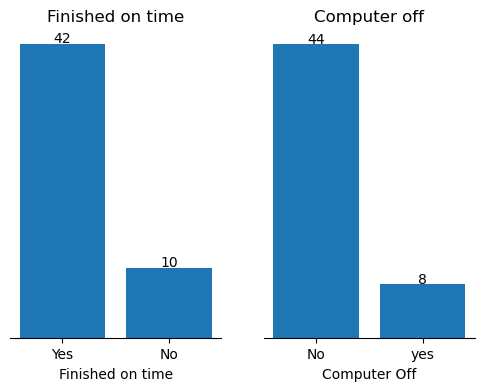

In [151]:
#plot a bar chart

fig, ax = plt.subplots(1, 2, figsize=[6,4])

ax[0].bar(x=df['Finished on time'].value_counts().index, height=df['Finished on time'].value_counts().values)
ax[1].bar(x=df['Computer Off'].value_counts().index, height=df['Computer Off'].value_counts().values)

#add title
ax[0].set_title('Finished on time')
ax[0].set_xlabel('Finished on time')
ax[0].yaxis.set_visible(False)

#add title
ax[1].set_title('Computer off')
ax[1].set_xlabel('Computer Off')
ax[1].yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[1].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Finished on time'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')
for index, values in enumerate(df['Computer Off'].value_counts()):
    ax[1].annotate(values, xy=(index, values+0.8), ha='center', va='center')


plt.show()

- 42 students finished on time while 10 didn't
- Only 8 students indicated that their computer went off during the exam

#### Distribution of Student who payed for the lesson by themselves

In [153]:
#student who payed themselves
df['Pay Yourself'].value_counts()

Pay Yourself
no     35
Yes    16
yes     1
Name: count, dtype: int64

In [154]:
#replace yes with Yes
df['Pay Yourself'] = df['Pay Yourself'].str.replace('yes', 'Yes')

In [155]:
df['Pay Yourself'].value_counts()

Pay Yourself
no     35
Yes    17
Name: count, dtype: int64

In [157]:
df['Close Proximity to center'].value_counts()

Close Proximity to center
yes    32
No     20
Name: count, dtype: int64

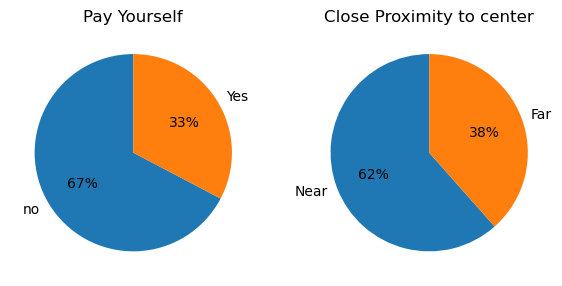

In [164]:
#plot a pie-chart
fig, ax = plt.subplots(1, 2, figsize=[7,4])
ax[0].pie(df['Pay Yourself'].value_counts().values, labels=df['Pay Yourself'].value_counts().index, autopct="%.0f%%", startangle=90)
ax[1].pie(df['Close Proximity to center'].value_counts().values, labels=['Near', 'Far'], 
          autopct="%.0f%%", startangle=90)

#add title
ax[0].set_title('Pay Yourself')
ax[1].set_title('Close Proximity to center')

plt.show()

- About 33% of the student payed for the lesson by themselves
- About 38% of the students live far from the center and takes a taxi to come

#### Bivariate Exploration

In [290]:
#create a dataframe of students who took exam in 2023 and 2024

wrote_twice = df[df['Score 2023'].notnull()]
wrote_twice.head(2)

,Student Name,Marital Status,Gender,Score 2023,Score 2024,English,Chemistry,Physics,Biology,Total,Date of Birth,Course Registered,University Registered,Date Registered,Date Stopped,Lesson Fee,Work Status,Hours Read,Read Past Questions,Teaching Satisfaction,Finished on time,Computer Off,Questions Different,Pay Yourself,Close Proximity to center,Student Age,Month Registered,Month Name,Month Stopped,Lesson Duration (Months),Total Lesson Fee,Satisfaction,Score Range
0,Chinelo Nneto,Single,F,171.0,217,49,67,53,48,217,2006-01-14,Pharmacy,Unizik,2024-01-09,2024-04-19,13000,No,5,Yes,5,No,No,No,no,yes,18,1,January,4,3,39000,Very Satisfied,200 - 249
1,Mmesoma Ofodile,Single,F,192.0,230,54,59,60,57,230,2007-08-12,Nursing,UNN,2024-01-10,2024-04-19,15000,No,4,Yes,5,Yes,No,No,no,yes,17,1,January,4,3,45000,Very Satisfied,200 - 249


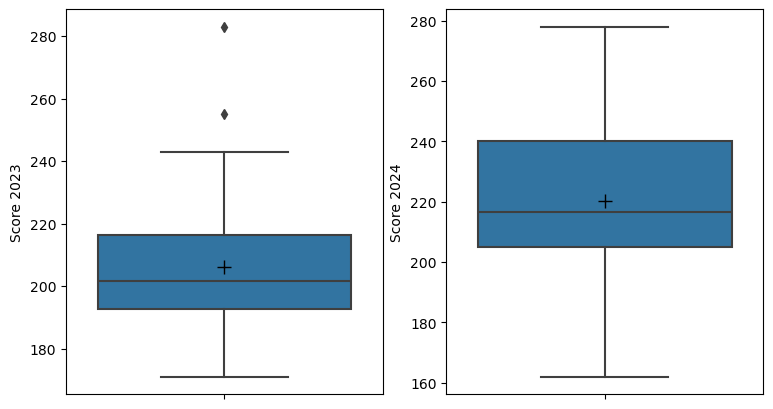

In [334]:
#plot a box plot of the scores
fig, ax = plt.subplots(1, 2, figsize=[9,5])

sns.boxplot(data=wrote_twice, y='Score 2023', ax=ax[0], 
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
sns.boxplot(data=wrote_twice, y='Score 2024', ax=ax[1],
           showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

plt.show()

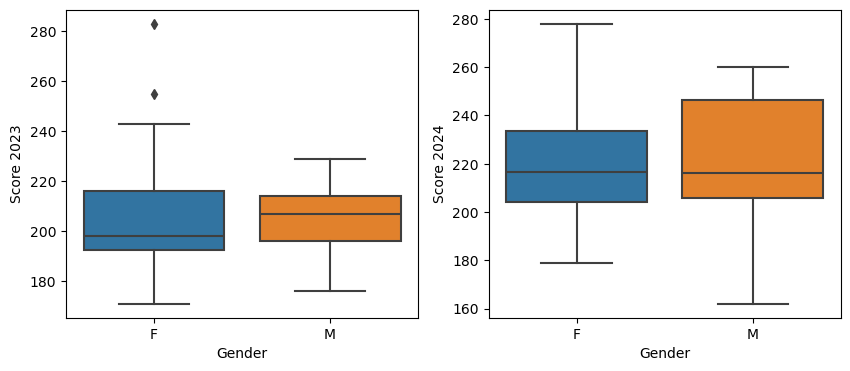

In [303]:
#plot a box plot of the scores
fig, ax = plt.subplots(1, 2, figsize=[10,4])

sns.boxplot(data=wrote_twice, x='Gender', y='Score 2023', ax=ax[0])
sns.boxplot(data=wrote_twice, x='Gender', y='Score 2024', ax=ax[1])

plt.show()

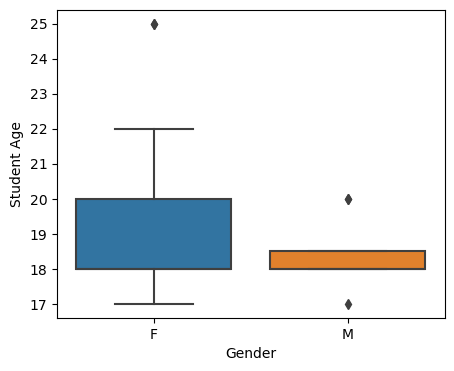

In [316]:
#plot a box plot of the scores
fig, ax = plt.subplots(figsize=[5,4])

sns.boxplot(data=wrote_twice, x='Gender', y='Student Age')

plt.show()

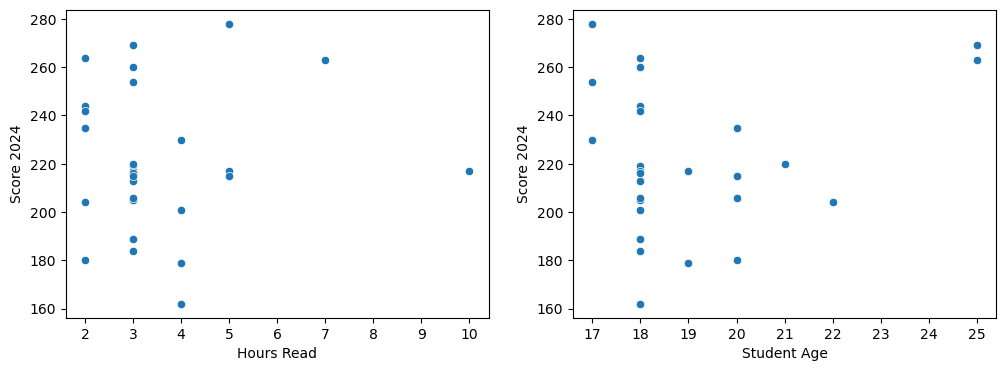

In [327]:
#plot a box plot of the scores
fig, ax = plt.subplots(1, 2, figsize=[12,4])

sns.scatterplot(x=wrote_twice['Hours Read'], y=wrote_twice['Score 2024'], ax=ax[0])
sns.scatterplot(x=wrote_twice['Student Age'], y=wrote_twice['Score 2024'], ax=ax[1])

plt.show()

- This chart above shows that there is no relationship between the scores and Student Age or Number of hours they read

## Data Analysis

### Question 1: What is the highest and lowest score in 2024 JAMB

In [165]:
#Find the highest score
highest_score = df['Score 2024'].max()
highest_score

290

In [167]:
#Find the lowest score
lowest_score = df['Score 2024'].min()
lowest_score

148

### Question 2: What are the top five scores and least five scores

#### Top 5 Scores

In [173]:
#top five scores
top_5_score = df[['Student Name' ,'Score 2024']].sort_values('Score 2024', ascending=False).head(5)
top_5_score

,Student Name,Score 2024
8,Anatogu Chidiebere,290
15,Odinaka Precious,278
25,Kate Iwobi,269
38,Amarachi Aneke,264
36,Oluebube Aneke,263


In [175]:
#assign a default index to the student
top_5_score['Rank'] = ['Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5']

In [176]:
top_5_score

,Student Name,Score 2024,Rank
8,Anatogu Chidiebere,290,Top 1
15,Odinaka Precious,278,Top 2
25,Kate Iwobi,269,Top 3
38,Amarachi Aneke,264,Top 4
36,Oluebube Aneke,263,Top 5


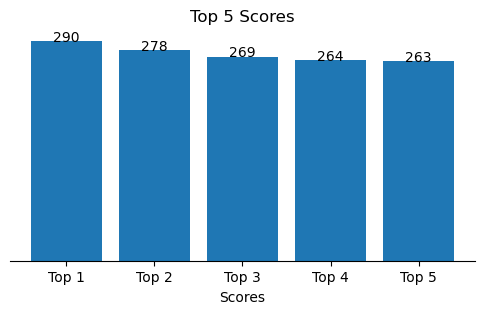

In [184]:
#plot a bar chart of the top 5 scores
fig, ax = plt.subplots(figsize=[6,3])

ax.bar(x=top_5_score['Rank'], height=top_5_score['Score 2024'])

#add title and labels
ax.set_title('Top 5 Scores')
ax.set_xlabel('Scores')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(top_5_score['Score 2024']):
    ax.annotate(values, xy=(index, values+5), ha='center', va='center')
plt.show()

#### Least 5 Scores

In [185]:
#least 5 scores
least_5_scores = df[['Student Name', 'Score 2024']].sort_values('Score 2024', ascending=False).tail(5)
least_5_scores

,Student Name,Score 2024
19,Akujieze Kosiso,168
35,Uche JohnMary,162
30,Uzochukwu Promise,161
41,Ndubude Jane,159
45,Ezinwanne Chinonso,148


In [187]:
#assign a default index to the student
least_5_scores['Rank'] = ['bottom 5', 'bottom 4', 'bottom 3', 'bottom 2', 'bottom 1']
least_5_scores

,Student Name,Score 2024,Rank
19,Akujieze Kosiso,168,bottom 5
35,Uche JohnMary,162,bottom 4
30,Uzochukwu Promise,161,bottom 3
41,Ndubude Jane,159,bottom 2
45,Ezinwanne Chinonso,148,bottom 1


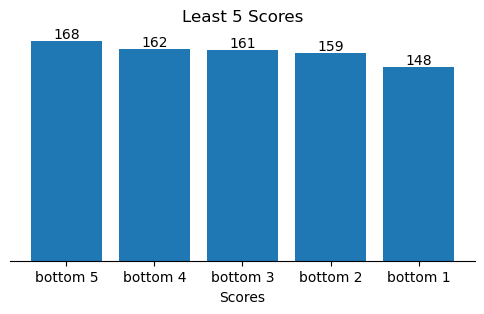

In [188]:
#plot a bar chart of the least 5 scores
fig, ax = plt.subplots(figsize=[6,3])

ax.bar(x=least_5_scores['Rank'], height=least_5_scores['Score 2024'])

#add title and labels
ax.set_title('Least 5 Scores')
ax.set_xlabel('Scores')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(least_5_scores['Score 2024']):
    ax.annotate(values, xy=(index, values+5), ha='center', va='center')
plt.show()

### Question 3: What Percentage Score below 200, 200-249 and above 250

##### Create a range for below 200, 200-249, 250-299, 300 above

In [192]:
#create a list of score range
score_range = []
for x in df['Score 2024']:
    if x < 200:
        score_range.append('Below 200')
    elif x < 250:
        score_range.append('200 - 249')
    elif x < 300:
        score_range.append('250 - 299')
    elif x > 300:
        score_range.append('Above 300')


In [193]:
#create a column score range
df['Score Range'] = score_range

In [196]:
#group by score range
score_category = df.groupby(['Score Range'], as_index=False).agg(total_no = ('Student Name', 'count'))
score_category

,Score Range,total_no
0,200 - 249,27
1,250 - 299,8
2,Below 200,17


In [198]:
#create the percentage os score category
score_category['perc'] = ((score_category['total_no']/score_category['total_no'].sum())*100).round(0)
score_category

,Score Range,total_no,perc
0,200 - 249,27,52.0
1,250 - 299,8,15.0
2,Below 200,17,33.0


In [203]:
#indexing the category
cat_index = []
for x in score_category['Score Range']:
    if x == 'Below 200':
        cat_index.append(1)
    elif x == '200 - 249':
        cat_index.append(2)
    elif x == '250 - 299':
        cat_index.append(3)
score_category['index'] = cat_index
score_category

,Score Range,total_no,perc,index
0,200 - 249,27,52.0,2
1,250 - 299,8,15.0,3
2,Below 200,17,33.0,1


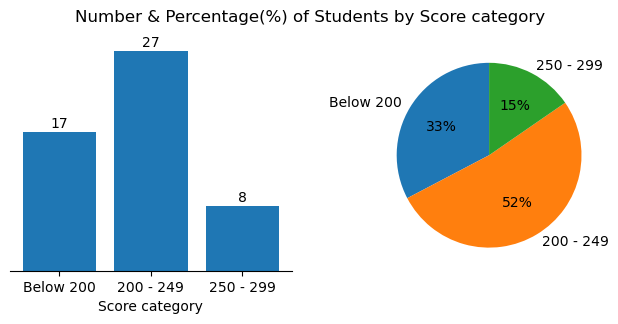

In [212]:
#plot a bar chart of the least 5 scores
fig, ax = plt.subplots(1, 2, figsize=[8,3])

#sort the dataframe
score_category_sorted = score_category.sort_values('index', ascending=True)
ax[0].bar(x=score_category_sorted['Score Range'], height=score_category_sorted['total_no'])

#add title and labels
fig.suptitle('Number & Percentage(%) of Students by Score category')
ax[0].set_xlabel('Score category')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[0].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(score_category_sorted['total_no']):
    ax[0].annotate(values, xy=(index, values+1), ha='center', va='center')

#second plot
ax[1].pie(score_category_sorted['total_no'], labels=score_category_sorted['Score Range'], autopct="%.0f%%", startangle=90)
plt.show()

- The chart shows that more than 50% score between **200-249**, 15% scored between **250-299** and 33% scored below 200

### Mean JAMB Score

In [218]:
mean_score = df['Score 2024'].mean()
mean_score

212.73076923076923

### Mean JAMB Score by Gender

In [216]:
mean_score_gender = df.groupby(['Gender'], as_index=False).agg(mean_score=('Score 2024', 'mean'))
mean_score_gender

,Gender,mean_score
0,F,211.783784
1,M,215.066667


#### The distribution of score by gender

In [228]:
#filter by gender=male
male_gender = df[df['Gender']=="M"]
female_gender = df[df['Gender']=='F']

C:\Users\MR VALENTINE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


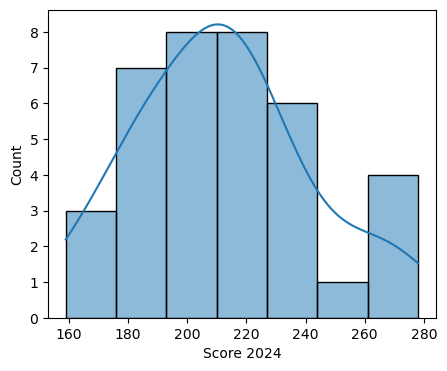

In [233]:
#plot the distribution of the score by female
fig, ax = plt.subplots(figsize=[5,4])

sns.histplot(data=female_gender, x='Score 2024', kde=True)
plt.show()

- The JAMB score for the female student is normally distributed

#### Number of Student enrolled per month

In [240]:
#Number of student enrolled by month
student_reg = df.groupby(['Month Registered', 'Month Name'], as_index=False).agg(student_reg=('Student Name', 'count')).sort_values('Month Registered', 
                                                                                                                                    ascending=True)
student_reg

,Month Registered,Month Name,student_reg
0,1,January,33
1,2,February,9
2,3,March,9
3,4,April,1


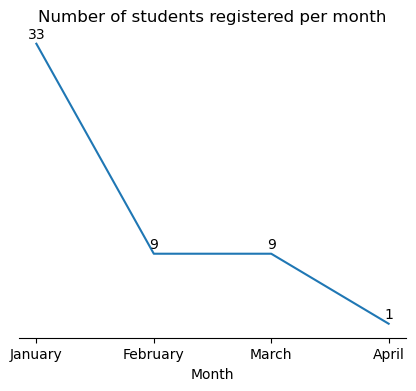

In [287]:
fig, ax = plt.subplots(figsize=[5,4])

ax.plot(student_reg['Month Name'] ,student_reg['student_reg'])

#add title and label
ax.set_title('Number of students registered per month')
ax.set_xlabel('Month')

#remove spines
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(student_reg['student_reg']):
    ax.annotate(values, xy=(index, values+1.1), ha='center', va='center')

plt.show()

### Question 4: What is the total revenue generated and by month?

#### Total Revenue

In [235]:
#determine the total revenue generated
total_revenue = df['Total Lesson Fee'].sum()
total_revenue

1584000

#### Total Revenue in January

In [242]:
#filter student who registered in January
jan_reg = df[df['Date Registered']<= '2024-01-31']

In [264]:
r_jan = jan_reg.groupby(['Month Name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_jan

,Month Name,Student_Reg,Total_Revenue
0,January,33,429000


#### Total Revenue in February

In [250]:
#filter student who registered between january and feb
feb_reg = df[df['Date Registered']<= '2024-02-29']

In [252]:
feb_reg['Month Name'].value_counts()

Month Name
January     33
February     9
Name: count, dtype: int64

In [253]:
#create a column with the same month name 'February
list1 = []
for x in feb_reg['Student Name']:
    list1.append('February')


In [256]:
feb_reg['Month_name'] = list1

C:\Users\MR VALENTINE\AppData\Local\Temp\ipykernel_11328\939676874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_reg['Month_name'] = list1


In [265]:
#group by month
r_feb = feb_reg.groupby(['Month_name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_feb

,Month_name,Student_Reg,Total_Revenue
0,February,42,527000


#### Total Revenue in March

In [259]:
#filter student who registered between january and march
mar_reg = df[df['Date Registered']<= '2024-03-31']

In [260]:
mar_reg['Month Name'].value_counts()

Month Name
January     33
February     9
March        9
Name: count, dtype: int64

In [261]:
#create a column with the same month name 'February
list2 = []
for x in mar_reg['Student Name']:
    list2.append('March')


In [262]:
mar_reg['Month_name'] = list2

C:\Users\MR VALENTINE\AppData\Local\Temp\ipykernel_11328\1224236231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar_reg['Month_name'] = list2


In [266]:
#group by month
r_mar = mar_reg.groupby(['Month_name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_mar

,Month_name,Student_Reg,Total_Revenue
0,March,51,628000


In [267]:
#rename columns
r_feb.rename(columns={
    'Month_name': 'Month Name'
}, inplace=True
            )

r_mar.rename(columns={
    'Month_name': 'Month Name'
}, inplace=True
            )

In [272]:
#concact the three dataframe
rev_concact = pd.concat([r_jan, r_feb, r_mar])
rev_concact

,Month Name,Student_Reg,Total_Revenue
0,January,33,429000
0,February,42,527000
0,March,51,628000


In [273]:
rev_concact.reset_index()

,index,Month Name,Student_Reg,Total_Revenue
0,0,January,33,429000
1,0,February,42,527000
2,0,March,51,628000


In [274]:
#drop the index column
rev_concact.drop('index', axis=1, inplace=True)

KeyError: "['index'] not found in axis"

In [276]:
rev_concact

,Month Name,Student_Reg,Total_Revenue
0,January,33,429000
0,February,42,527000
0,March,51,628000


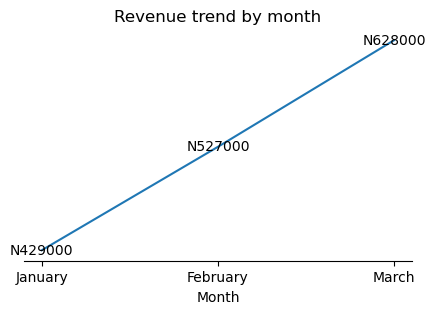

In [281]:
#plot a line chart of the revenue trend

fig, ax = plt.subplots(figsize=[5,3])
ax.plot(rev_concact['Month Name'], rev_concact['Total_Revenue'])

#add title
ax.set_title('Revenue trend by month')
ax.set_xlabel('Month')

ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(rev_concact['Total_Revenue']):
    ax.annotate('N'+ str(values), xy=(index, values), ha='center', va='center')
plt.show()

### Question 6: Did the student performance in 2024 differ significantly from 2023 performance

In [336]:
#import the statistics
from scipy import stats

In [337]:
wrote_twice.head(2)

,Student Name,Marital Status,Gender,Score 2023,Score 2024,English,Chemistry,Physics,Biology,Total,Date of Birth,Course Registered,University Registered,Date Registered,Date Stopped,Lesson Fee,Work Status,Hours Read,Read Past Questions,Teaching Satisfaction,Finished on time,Computer Off,Questions Different,Pay Yourself,Close Proximity to center,Student Age,Month Registered,Month Name,Month Stopped,Lesson Duration (Months),Total Lesson Fee,Satisfaction,Score Range
0,Chinelo Nneto,Single,F,171.0,217,49,67,53,48,217,2006-01-14,Pharmacy,Unizik,2024-01-09,2024-04-19,13000,No,5,Yes,5,No,No,No,no,yes,18,1,January,4,3,39000,Very Satisfied,200 - 249
1,Mmesoma Ofodile,Single,F,192.0,230,54,59,60,57,230,2007-08-12,Nursing,UNN,2024-01-10,2024-04-19,15000,No,4,Yes,5,Yes,No,No,no,yes,17,1,January,4,3,45000,Very Satisfied,200 - 249


In [339]:
#create the pre score and post score variables
score_2023 = wrote_twice['Score 2023']
score_2024 = wrote_twice['Score 2024']

In [ ]:
# H0: 2023 mean score is not different from 2024 mean score
# H1: 2023 mean score is significantly different from 2024 mean score

In [341]:
#performing the paired sample t-test
stats.ttest_rel(score_2023, score_2024)

TtestResult(statistic=-2.945124213663602, pvalue=0.006303139055985733, df=29)

In [342]:
# H0: The null hypothesis is rejected
# The 2024 mean score differs significantly at p=0.05

In [353]:
df.columns

Index(['Student Name', 'Marital Status', 'Gender', 'Score 2023', 'Score 2024',
       'English', 'Chemistry', 'Physics', 'Biology', 'Total', 'Date of Birth',
       'Course Registered', 'University Registered', 'Date Registered',
       'Date Stopped', 'Lesson Fee', 'Work Status', 'Hours Read',
       'Read Past Questions', 'Teaching Satisfaction', 'Finished on time',
       'Computer Off', 'Questions Different', 'Pay Yourself',
       'Close Proximity to center', 'Student Age', 'Month Registered',
       'Month Name', 'Month Stopped', 'Lesson Duration (Months)',
       'Total Lesson Fee', 'Satisfaction', 'Score Range'],
      dtype='object')

#### Performance of Female vs. Male in 2024 JAMB

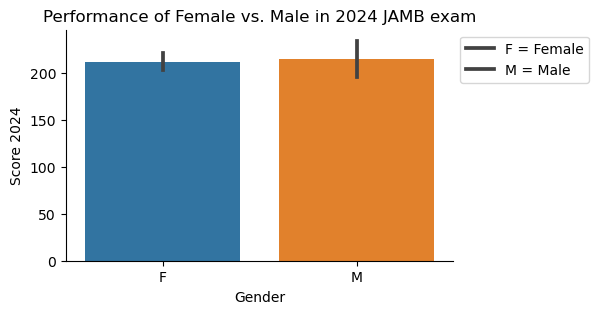

In [384]:
# plotting a barplot of the 2024 JAMB score of the male and female

fig, ax = plt.subplots(figsize=[5,3])

sns.barplot(data=df, x='Gender', y='Score 2024')

#add title
ax.set_title('Performance of Female vs. Male in 2024 JAMB exam')
ax.spines[['top','right']].set_visible(False)
ax.legend(['F = Female', 'M = Male'], bbox_to_anchor=(1,1))

plt.show()

In [361]:
#grouping by gender and calculating the mean score and standard deviation
df.groupby(['Gender']).agg(mean=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,mean,std
Gender,,
F,211.783784,29.367532
M,215.066667,40.925833


- The Female have a **mean score** of **211** and a low standard deviation of 29 while the male have a mean score of 215 which is high by 4 and a high standard deviation of 40.
- The difference in the mean is a little low but in terms of standard deviation, the standard deviation of the male score show that their scores are spread out from the mean.
- Therefore, the female perform better in the JAMB than the male

#### Performance of Student who live CLOSE and FAR to the center

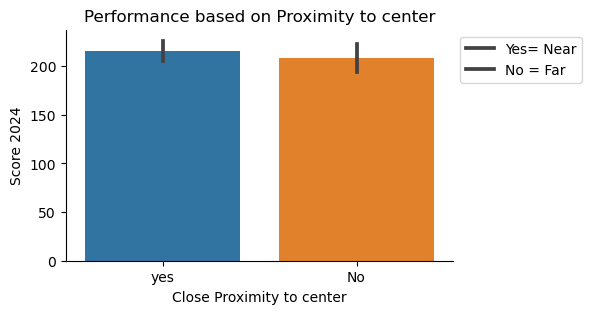

In [386]:
# plotting a barplot of the 2024 JAMB score of student who live close and Far

fig, ax = plt.subplots(figsize=[5,3])

sns.barplot(data=df, x='Close Proximity to center', y='Score 2024')

#add title
ax.set_title('Performance based on Proximity to center')
ax.spines[['top','right']].set_visible(False)
ax.legend(['Yes= Near', 'No = Far'], bbox_to_anchor=(1,1))

plt.show()

In [365]:
df.groupby(['Close Proximity to center']).agg(mean=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,mean,std
Close Proximity to center,,
No,208.55000,34.858322
yes,215.34375,31.600949


- Those who live closer to the center had higher mean score and low standard deviation, this implies that they perform better in the Exam

In [369]:
df.columns

Index(['Student Name', 'Marital Status', 'Gender', 'Score 2023', 'Score 2024',
       'English', 'Chemistry', 'Physics', 'Biology', 'Total', 'Date of Birth',
       'Course Registered', 'University Registered', 'Date Registered',
       'Date Stopped', 'Lesson Fee', 'Work Status', 'Hours Read',
       'Read Past Questions', 'Teaching Satisfaction', 'Finished on time',
       'Computer Off', 'Questions Different', 'Pay Yourself',
       'Close Proximity to center', 'Student Age', 'Month Registered',
       'Month Name', 'Month Stopped', 'Lesson Duration (Months)',
       'Total Lesson Fee', 'Satisfaction', 'Score Range'],
      dtype='object')

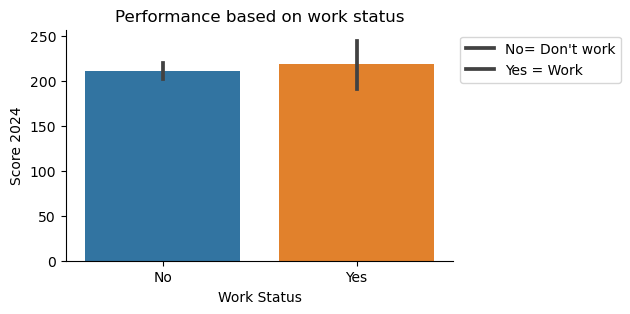

In [385]:
# plotting a barplot of the 2024 JAMB score of student who live close and Far

fig, ax = plt.subplots(figsize=[5,3])

sns.barplot(data=df, x='Work Status', y='Score 2024')

#add title
ax.set_title('Performance based on work status')
ax.spines[['top','right']].set_visible(False)
ax.legend(['No= Don\'t work', 'Yes = Work'], bbox_to_anchor=(1,1))
plt.show()

In [373]:
df.groupby(['Work Status']).agg(mean=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,mean,std
Work Status,,
No,211.261905,29.131376
Yes,218.900000,46.364378


- On Average, student that work had a better score but the standard deviation is higher which implies the scores are spread out from the mean
- The students that did not work had a mean score that is 7 less but had a lower standard deviation, implying that the scores are less spread out from the mean
- Based on this facts, the students who did not worked performed better in the JAMB Exam

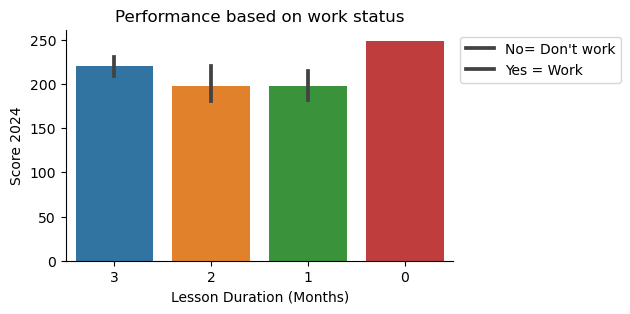

In [389]:
# plotting a barplot of the 2024 JAMB score of student who live close and Far

fig, ax = plt.subplots(figsize=[5,3])
les_dur=df['Lesson Duration (Months)'].astype('str')
sns.barplot(x=les_dur, y=df['Score 2024'])

#add title
ax.set_title('Performance based on work status')
ax.spines[['top','right']].set_visible(False)
ax.legend(['No= Don\'t work', 'Yes = Work'], bbox_to_anchor=(1,1))
plt.show()

In [391]:
df.groupby(['Lesson Duration (Months)']).agg(tot=('Student Name', 'count'), avg=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,tot,avg,std
Lesson Duration (Months),,,
0,1,249.000000,NaN
1,9,197.444444,25.323463
2,9,197.555556,32.097940
3,33,219.939394,32.612248
